In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cr=pd.read_csv(r"C:\Users\yogesh\Downloads\Datasets\CreditRisk.csv")
cr.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
cr.shape

(981, 13)

In [4]:
#problem statement

#1 build a  predictive model which i can use to predict loan for the new person who applies for the loan

#2 use this data for running the marketing campaigne/sales strategy to target the good customers

In [5]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
cr.Gender=cr.Gender.fillna('Male')
cr.Married=cr.Married.fillna('No')
cr.Dependents=cr.Dependents.fillna(0)
cr.Self_Employed=cr.Self_Employed.fillna('Yes')
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History=cr.Credit_History.fillna(cr.Credit_History.fillna(0))

In [7]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
cr1=cr.iloc[:,1:13]  #remove loan id

In [9]:
cr1.Gender.replace({'Male':1,'Female':0},inplace=True)
cr1.Married.replace({'No':0,'Yes':1},inplace=True)
cr1.Education.replace({'Graduate':1,'Not Graduate':0},inplace=True)
cr1.Self_Employed.replace({'No':0,'Yes':1},inplace=True)
cr1.Property_Area.replace({'Semiurban':1,'Urban':2,'Rural':3},inplace=True)
cr1.Loan_Status.replace({'Y':1,'N':0},inplace=True)

In [10]:
cr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        981 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 92.1 KB


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
#cr1[cr1.select_dtypes(include=['object']).columns]=cr1[cr1.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
cr1_x=cr1.iloc[:,0:11]
cr1_y=cr1.iloc[:,-1]

In [16]:
cr1_x_train,cr1_x_test,cr1_y_train,cr1_y_test=train_test_split(cr1_x,cr1_y,test_size=.2,random_state=555)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel=LogisticRegression()

In [19]:
logmodel.fit(cr1_x_train,cr1_y_train)

LogisticRegression()

In [20]:
pred_value=logmodel.predict(cr1_x_test)
pred_value

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
#sklearn.metrics includes many linear reg functions ......explore it

In [22]:
tab1=confusion_matrix(pred_value,cr1_y_test)

In [23]:
tab1

array([[ 28,  15],
       [ 33, 121]], dtype=int64)

In [24]:
tab1.diagonal().sum()* 100 / tab1.sum()

75.63451776649747

In [25]:
logmodel.predict_proba(cr1_x_test)

array([[0.11982944, 0.88017056],
       [0.11763677, 0.88236323],
       [0.15897438, 0.84102562],
       [0.77384086, 0.22615914],
       [0.29660928, 0.70339072],
       [0.10512923, 0.89487077],
       [0.60602856, 0.39397144],
       [0.08855482, 0.91144518],
       [0.09132413, 0.90867587],
       [0.54217345, 0.45782655],
       [0.06555439, 0.93444561],
       [0.05994116, 0.94005884],
       [0.11979301, 0.88020699],
       [0.2359335 , 0.7640665 ],
       [0.0637117 , 0.9362883 ],
       [0.59437963, 0.40562037],
       [0.13238067, 0.86761933],
       [0.0683354 , 0.9316646 ],
       [0.81494659, 0.18505341],
       [0.1989615 , 0.8010385 ],
       [0.15781508, 0.84218492],
       [0.1224623 , 0.8775377 ],
       [0.1533618 , 0.8466382 ],
       [0.07197139, 0.92802861],
       [0.782748  , 0.217252  ],
       [0.7967634 , 0.2032366 ],
       [0.16152642, 0.83847358],
       [0.17447077, 0.82552923],
       [0.50629471, 0.49370529],
       [0.11963525, 0.88036475],
       [0.

In [26]:
logmodel.predict(cr1_x_test)   # getting the results of records

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [27]:
logmodel.coef_.shape

(1, 11)

In [28]:
aa=logmodel.coef_.reshape(11,1)

In [29]:
df1=pd.DataFrame()

In [30]:
df1['beta']=list(aa)
df1['Feature_Names']=list(cr1_x.columns)

In [31]:
df1.sort_values('beta',ascending=False)

,beta,Feature_Names
9,[2.456961491903446],Credit_History
3,[0.42765245637731397],Education
1,[0.3674239197553569],Married
0,[0.09385561805109455],Gender
2,[0.030124415235002054],Dependents
5,[1.6107109230574523e-05],ApplicantIncome
6,[-3.163684625296281e-05],CoapplicantIncome
8,[-0.0008289530914626342],Loan_Amount_Term
7,[-0.0021565072928179277],LoanAmount
4,[-0.012216593484427914],Self_Employed


In [32]:
#2 use this data for running the marketing campaigne/sales strategy to target the good customers

#eg india vs rival
# 1(.9  ,.1)  /
#2(.8 , .2)  /
#3(.51, .49) /
#4(.1, .99) /

In [33]:
#do the predictiion on full data

In [34]:
pred_prob_full=logmodel.predict_proba(cr1_x)

In [35]:
pred_prob_full

array([[0.15543697, 0.84456303],
       [0.17447077, 0.82552923],
       [0.10276298, 0.89723702],
       ...,
       [0.58288689, 0.41711311],
       [0.19182953, 0.80817047],
       [0.18535429, 0.81464571]])

In [36]:
pred_prob_full=pd.DataFrame(pred_prob_full)   #convert into dataframe

In [37]:
pred_prob_full.head()

,0,1
0,0.155437,0.844563
1,0.174471,0.825529
2,0.102763,0.897237
3,0.174554,0.825446
4,0.154691,0.845309


In [38]:
pred_prob_full.rename(columns={pred_prob_full.columns[0]:'Prob0',pred_prob_full.columns[1]:'Prob1'},inplace=True)

In [39]:
pred_prob_full

,Prob0,Prob1
0,0.155437,0.844563
1,0.174471,0.825529
2,0.102763,0.897237
3,0.174554,0.825446
4,0.154691,0.845309
...,...,...
976,0.152075,0.847925
977,0.112080,0.887920
978,0.582887,0.417113
979,0.191830,0.808170


In [40]:
pred_prob_full['Cus_Loan_ID']=cr.Loan_ID

In [41]:
pred_prob_full

,Prob0,Prob1,Cus_Loan_ID
0,0.155437,0.844563,LP001002
1,0.174471,0.825529,LP001003
2,0.102763,0.897237,LP001005
3,0.174554,0.825446,LP001006
4,0.154691,0.845309,LP001008
...,...,...,...
976,0.152075,0.847925,LP002971
977,0.112080,0.887920,LP002975
978,0.582887,0.417113,LP002980
979,0.191830,0.808170,LP002986


In [42]:
pred_prob_full.sort_values('Prob1',ascending=False)

,Prob0,Prob1,Cus_Loan_ID
185,0.048271,0.951729,LP001640
133,0.049233,0.950767,LP001482
673,0.050988,0.949012,LP001324
182,0.055302,0.944698,LP001636
424,0.057064,0.942936,LP002364
...,...,...,...
965,0.847702,0.152298,LP002901
130,0.850671,0.149329,LP001469
761,0.855592,0.144408,LP001817
639,0.893668,0.106332,LP001153


In [43]:
pred_prob_full.sort_values('Prob1',ascending=False,inplace=True)

In [44]:
pred_prob_full=pred_prob_full.iloc[: ,[1,2]]

In [45]:
#pred_full_values

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
cr_auc_score=roc_auc_score(cr1_y_test,pred_value)  #gives the AUROC curve
cr_auc_score

0.6743611378977821

In [48]:
pred_value_pr=logmodel.predict_proba(cr1_x_test)
#pred_value_pr

In [49]:
pred_value_pr=pd.DataFrame(pred_value_pr)

In [50]:
pred_value_pr=pred_value_pr.iloc[:,-1]

In [51]:
fpr,tpr,threshold=roc_curve(cr1_y_test,pred_value_pr)

In [52]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'AUROC curve on the Credit Risk')

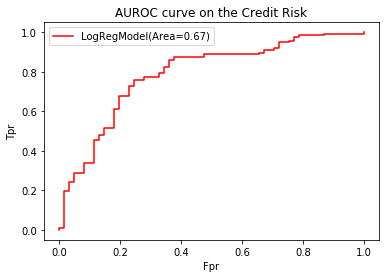

In [53]:
plt.plot(fpr,tpr,color='r',label='LogRegModel(Area=%.2f)' %cr_auc_score)

plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.legend(loc='upper left')
plt.title('AUROC curve on the Credit Risk')

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [56]:
dtree.fit(cr1_x_train,cr1_y_train)

DecisionTreeClassifier(criterion='entropy')

In [57]:
pred_dt=dtree.predict(cr1_x_test)

In [65]:
tab2=confusion_matrix(pred_dt,cr1_y_test)

In [66]:
tab2.diagonal().sum()  *100/tab2.sum()

72.58883248730965

In [67]:
dtree.feature_importances_

array([0.02245671, 0.01231138, 0.05085579, 0.01438902, 0.01244217,
       0.24602423, 0.12031448, 0.22975402, 0.03130339, 0.21215829,
       0.04799051])

In [68]:
dtree.feature_importances_.sum()   #value is 1
                                   #higher the score more importance is the feature

1.0000000000000002

In [69]:
cr1_x_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [70]:
feature_importance=pd.DataFrame({'Features':list(cr1_x_test.columns),'Importance':list(dtree.feature_importances_)})

In [71]:
feature_importance.sort_values('Importance',ascending=False)

,Features,Importance
5,ApplicantIncome,0.246024
7,LoanAmount,0.229754
9,Credit_History,0.212158
6,CoapplicantIncome,0.120314
2,Dependents,0.050856
10,Property_Area,0.047991
8,Loan_Amount_Term,0.031303
0,Gender,0.022457
3,Education,0.014389
4,Self_Employed,0.012442
